# Visualisering av en enkel robotarm i 2D

I denne notatboken regner vi ut koordinatene og visualiserer en enkel to-dimensional robotarm med to ledd, hver med én frihetsgrad. Leddene vil vi kalle for overarm og underarm. Overarmen har lengde $l_1$ og underarmen har lengde $l_2$. Vinkelen mellom overarm og posistiv x-akse er $\theta_1$ og vinkelen mellom overarm og underarm er $\theta_2$.

*Merk* at vi ikke antar usikkerhet i vinklene i denne notaboken. Dere kan likevel bruke notatboken til å løse oppgave 2, del 2, ved å legge til egen kode nederst.

Bruk notatboken til å (1) lære om homogene koordinator og robot-arm, og (2) regne ut sluttposisjon til robotarmen og visualisere resultatet.

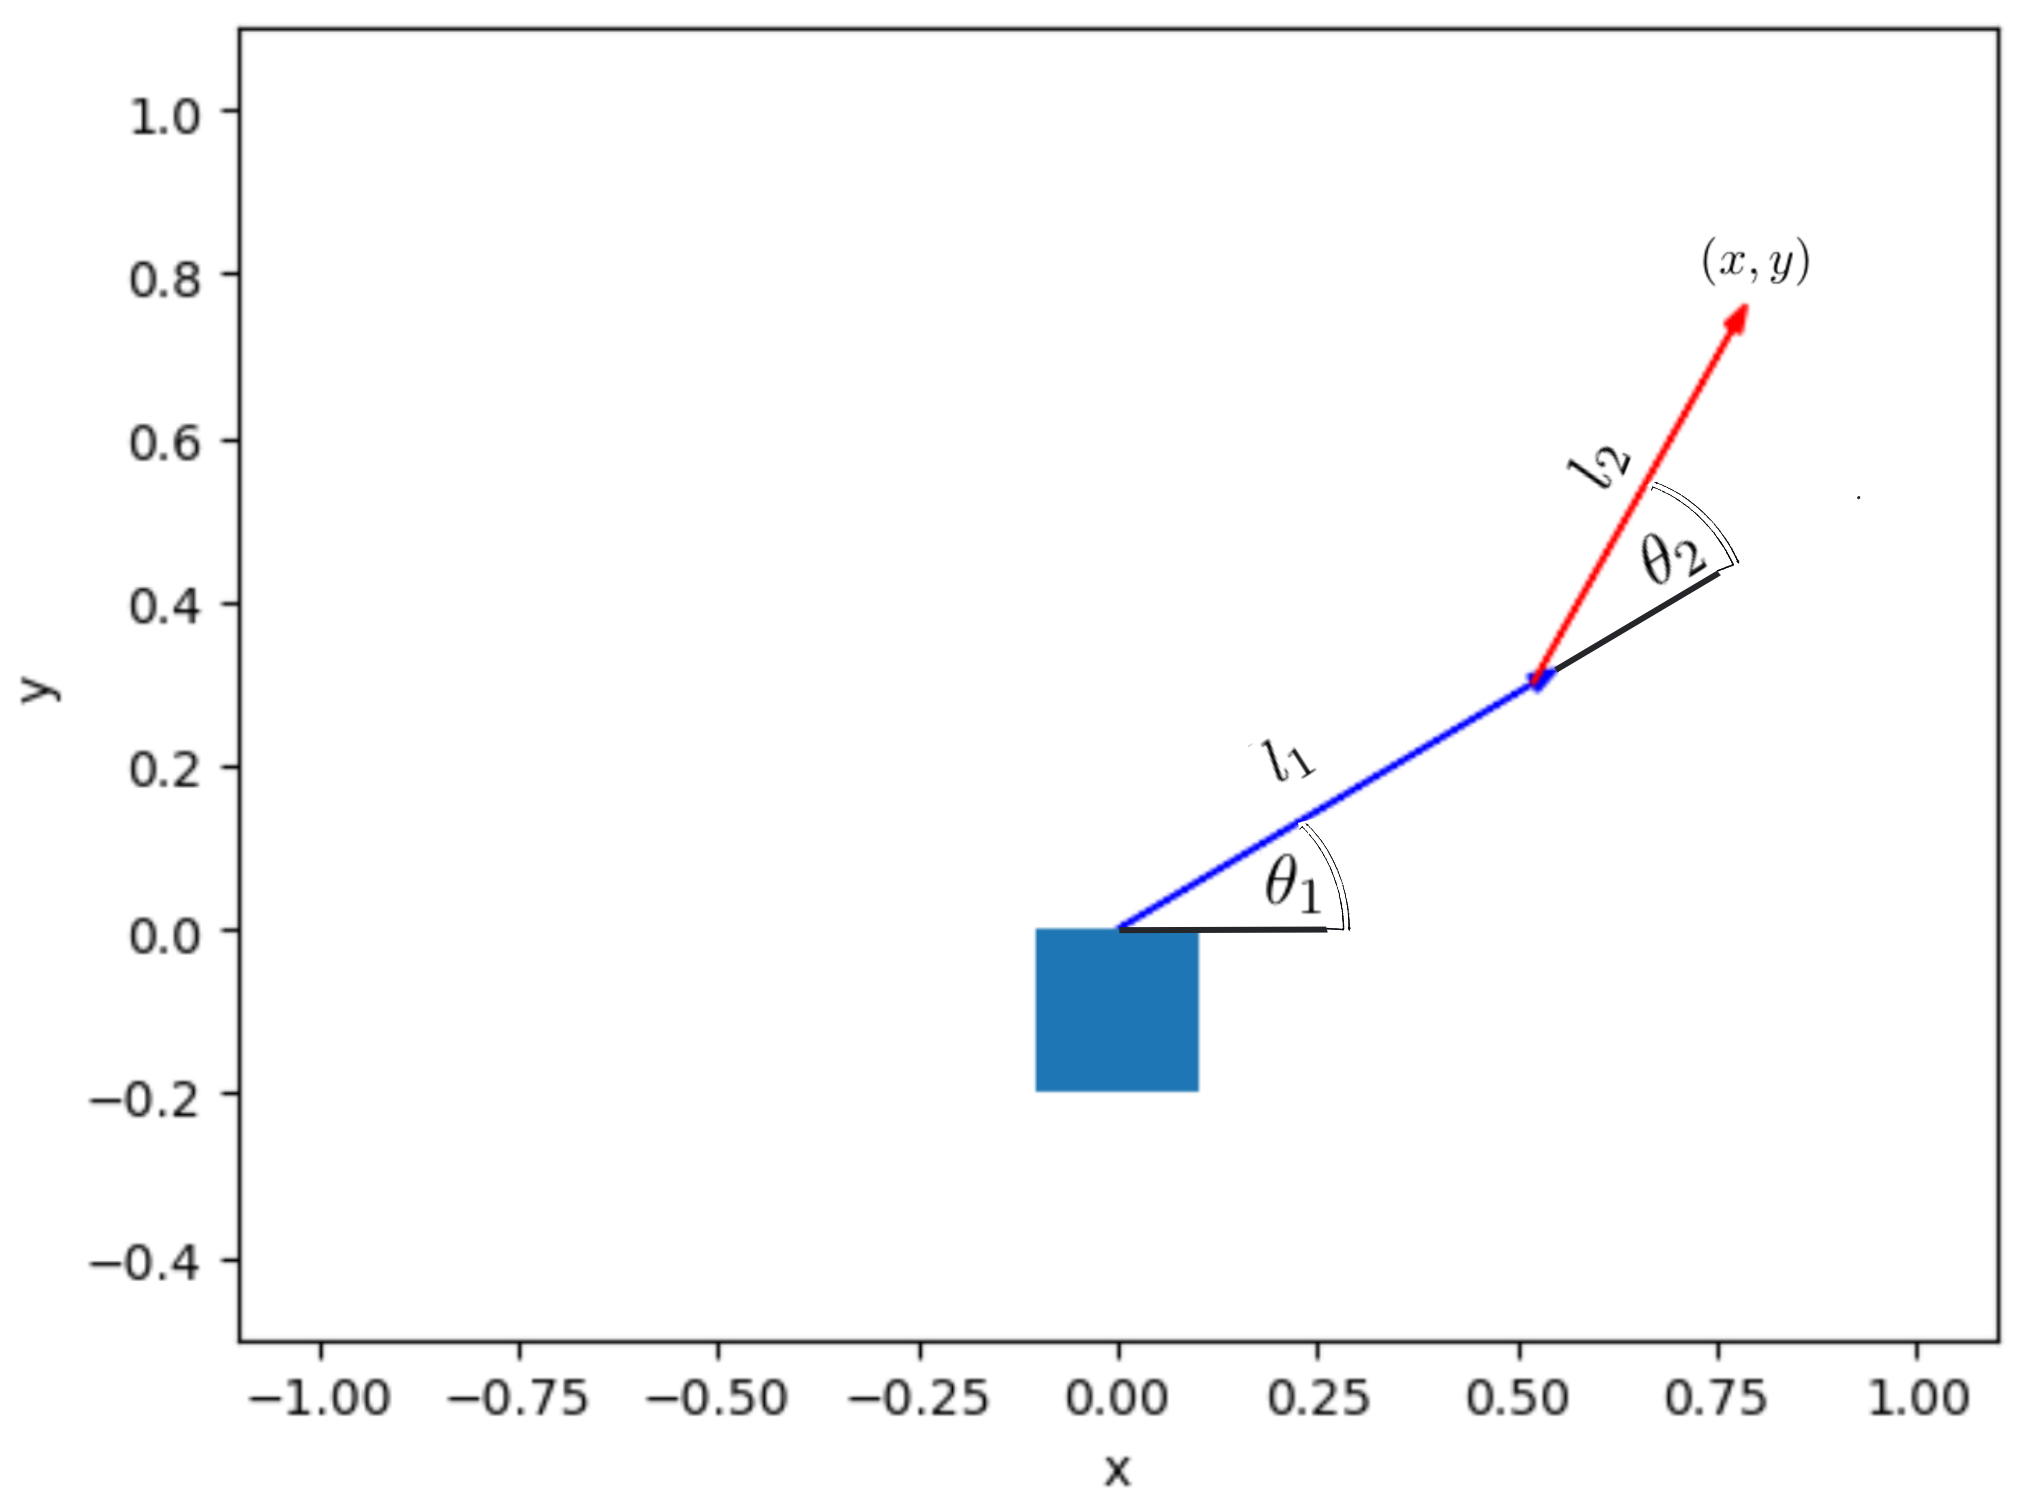

In [ ]:
# For å jobbe med første del av notatboken trenger vi disse bibliotekene
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

## Homogene koordinater
For å regne ut posisjonene til leddene skal vi bruke såkalte $\textit{homogene koordinater}$. Merk at for å besvare oppgavene i prosjektet i 1002 trenger du ikke å forstå detaljene om homogene koordinater. 

I homogene koordinater følger det med én ekstra koordinat som bl.a. gjør det mulig å translere (flytte) et punkt med hjelp av en matrisemultiplikasjon. Vi kan enkelt innse at dette ikke er mulig med en "vanlig" matrisemultiplikasjon: For å flytte origo $(0, 0)^T$ en avstand $\Delta x$ i x-retningen ved å multiplisere med en 2x2-matrise $T(\Delta x)$ må vi finne en matrise $T(\Delta x)$ slik at
\begin{align}T(\Delta x)\begin{bmatrix}
           0 \\
           0
         \end{bmatrix}=\begin{bmatrix}
           t_{11} & t_{12}\\
           t_{21} & t_{22}
         \end{bmatrix}\begin{bmatrix}
           0 \\
           0
         \end{bmatrix}=\begin{bmatrix}
           \Delta x \\
           0
         \end{bmatrix}\end{align}
Men når $\Delta x \neq 0$ er denne likningen umulig å løse: Når vi multipliserer en matrise med nullvektoren vil resultatet alltid være $\vec 0$.

Det viser seg at vi kan løse dette problemet på en elegant måte ved å legge til en ekstra koordinat slik at posisjonsvektorene får lengde 3 og matrisen $T(\Delta x)$ blir 3x3. For å gjøre 2-vektoren $(x,y)^T$ om til homogene koordinater legger vi til en ener på slutten: $(x, y, 1)^T$. Matrisen $T(\Delta x)$ som flytter punktet $(x, y)^T$ en avstand $\Delta x$ i x-retningen, altså til $(x+\Delta x, y)^T$, fungerer slik i homogene koordinater:
\begin{align}T(\Delta x)\begin{bmatrix}
           x \\
           y \\
           1
         \end{bmatrix}=\begin{bmatrix}
           1 & 0 & \Delta x \\
           0 & 1 & 0 \\
           0 & 0 & 1
         \end{bmatrix}\begin{bmatrix}
           x \\
           y \\
           1
         \end{bmatrix}=\begin{bmatrix}
           x+\Delta x \\
           y \\
           1
         \end{bmatrix}\end{align}
Den homogene rotasjonsmatrisen $R(\alpha)$ for rotasjon om origo på $\alpha$ grader (altså mot klokken) ser slik ut:
\begin{align}R(\alpha)=\begin{bmatrix}
           \cos(\alpha) & -\sin(\alpha) & 0 \\
           \sin(\alpha) & \cos(\alpha) & 0 \\
           0 & 0 & 1
         \end{bmatrix}\end{align}
N.B. Her er $\alpha$ antall radianer, ikke grader!

Vi kan f. eks. teste ut $R(\alpha)$ ved å anvende den på vektoren $\bf{x}$ $=(x,0)^T$ (som skrives som $(x,0,1)^T$ i homogene koordinater):
\begin{align}R(\alpha)\begin{bmatrix}
           x \\
           0 \\
           1
         \end{bmatrix}=\begin{bmatrix}
           \cos(\alpha) & -\sin(\alpha) & 0 \\
           \sin(\alpha) & \cos(\alpha) & 0 \\
           0 & 0 & 1
         \end{bmatrix}\begin{bmatrix}
           x \\
           0 \\
           1
         \end{bmatrix}=\begin{bmatrix}
           x \cos(\alpha) \\
           x \sin(\alpha) \\
           1
         \end{bmatrix}\end{align}
Resultatet blir altså vektoren $(x \cos(\alpha), x\sin(\alpha))$, som det skal være.

Hvordan kan vi nå bruke homogene rotasjons- og translasjonsmatriser for å regne ut posisjonene til leddene av robotarmen? Svaret er at vi kan dele opp utregningen i små steg. For eksempel kan vi regne ut endepunktet $\vec b$ til overarmen (som har lengde $l_1$ og utgjør en vinkel $\theta_1$ med positiv x-akse) ved å først flytte $(0, 0)^T$ til $(l_1, 0)^T$ og så rotere resultatet $\phi_1$ grader om origo:

\begin{align}\vec b=\begin{bmatrix}
           \cos(\phi_1) & -\sin(\phi_1) & 0 \\
           \sin(\phi_1) & \cos(\phi_1) & 0 \\
           0 & 0 & 1
         \end{bmatrix}\begin{bmatrix}
           1 & 0 & l_1 \\
           0 & 1 & 0 \\
           0 & 0 & 1
         \end{bmatrix}\begin{bmatrix}
           0 \\
           0 \\
           1
         \end{bmatrix}=\begin{bmatrix}
           l_1 \cos(\phi_1) \\
           l_1 \sin(\phi_1) \\
           1
         \end{bmatrix}\end{align}
N.B. Her har vi brukt vinkelen $\phi_1=\frac{\pi}{180^{o}}\cdot\theta_1$ for å gjøre om fra grader til radianer siden vi har definert $\theta_1$ i grader. I matrisenotasjon: $\vec b=R(\phi_1)T(l_1)\vec 0$. På samme måte kan vi regne ut endepunktet $\vec c$ til underarmen (som har lengde $l_2$ og utgjør en vinkel $\theta_2$ med overarmen) som: $\vec c=R(\phi_1)T(l_1)R(\phi_2)T(l_2)\vec 0$ der $\phi_2=\frac{\pi}{180^{o}}\cdot\theta_2$.

Homogene koordinater kan enkelt utvides til 3 dimensjoner og spiller bl.a. en sentral rolle i robot-kinematikk (som vi holder på med nå), datagrafikk og datasyn.

### Utregning av leddenes posisjon med Python

In [ ]:
# Først setter vi lengder og vinkler:
theta1 = 30     # Vinkel mellom positiv x-akse og "overarm" i grader
l1 = 60        # Lengde til overarm (f. eks. i meter)
theta2 = 30   # Vinkel mellom overarm og underarm i grader
l2 = 50        # Lengde til underarm (bruk samme lengde-enhet som for l1).

In [ ]:
# Funksjoner som inngår i utregning med homogene koordinater

np.set_printoptions(formatter={'float_kind': "{: .6f}".format})

def M_rotasjon2D(theta):
# Funksjon som definerer en homogen rotasjonsmatrise (3x3) for to romlige dimensjoner.
# I såkalte homogene koordinater bruker vi en ekstra dimensjon (slik at en homogen 3x3-matrise beskriver
# en tranformasjon i to romlige dimensjoner).
# Den ekstra koordinaten gjør det bl.a. mulig å beskrive forflytning ved matrisemultiplikasjon.
# Theta skal oppgis i grader.
    c = np.cos(theta*np.pi/180)
    s = np.sin(theta*np.pi/180)
    return np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

def M_translasjon2D(x,y):
# Homogen translasjonsmatrise (3x3) for to romlige dimensjoner.
    return np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])

def konkatener(Mliste):
# Funksjon som multipliserer alle matrisene i Mliste. Mliste er altså en liste av homogene
# transformasjonsmatriser (bortsatt fra posA som er en homogen kolonnevektor - se nederst)
    svar = 1
    for M in reversed(Mliste):
        svar = np.dot(M, svar)
    return svar

In [ ]:
# Utregning av leddenes posisjon:

# Definerer først de elementære transformasjonsmatrisene:
R1 = M_rotasjon2D(theta1)
T1 = M_translasjon2D(l1,0)
R2 = M_rotasjon2D(theta2)
T2 = M_translasjon2D(l2,0)

posA = [[0],[0],[1]]; #Homogen kolonnevektor for origo i to romlige koordinater (d.v.s. (0.0)).
posB = konkatener([R1,T1,posA]); # Endepunktet til overarmen regnes ut ved å først translere origo
#over en avstand l1 langs x-aksen og så å rotere over theta1 grader om origo.
posC = konkatener([R1,T1,R2,T2,posA]); # Endepunktet til underarmen regnes ut ved først å anvende
# translasjonsmatrisen T2 på origo, så rotasjonsmatrisen R2, så T1 og til slutt R1.

print("Endepunkt overarm: (x_over,y_over) = \n", posB[:-1], "\n")
print("Endepunkt underarm: (x_under,y_under)= \n", posC[:-1], "\n")

In [ ]:
# Endepunktet til underarmen kan også regnes direkte
# ved hjelp av formlene i prosjektoppgaven:
xend = l1*np.cos(theta1/180*np.pi)+l2*np.cos((theta1+theta2)/180*np.pi)
yend = l1*np.sin(theta1/180*np.pi)+l2*np.sin((theta1+theta2)/180*np.pi)

print("Endepunkt underarm: x, y = ", round(xend,3), ",", round(yend,3), "\n")

In [ ]:
# Visualisering av robotarm for valgte innstillinger
fig, ax = plt.subplots()
ax.set_xlabel('x') 
ax.set_ylabel('y')

bredde = abs(l1)+abs(l2) # Definer bredden slik at robotarmen alltid vises i sin helhet.
plt.xlim(-bredde, bredde)   # Set x-axis range 
plt.ylim(-abs(l2), bredde)  # Set y-axis range

#Tegn robotarmen:
plt.arrow(posA[0][0], posA[1][0], posB[0][0]-posA[0][0], posB[1][0]-posA[1][0], head_width=0.02*bredde, color='b');
plt.arrow(posB[0][0], posB[1][0], posC[0][0]-posB[0][0], posC[1][0]-posB[1][0], head_width=0.02*bredde, color='r');
 
#Hjelpelinje for å angi vinkel theta_1:
hjelp1 = [[0.25*np.linalg.norm(posB)],[0],[1]]; #Støttepunkt 1
plt.plot([0, hjelp1[0][0]], [0, hjelp1[1][0]], linestyle='dashed', color='k')

#Hjelpelinje for å angi vinkel theta_2:
hjelp2 = posB*1.25; #Støttepunkt 2
hjelp3 = posB + 0.3*(posC-posB); #Støttepunkt 3
plt.plot([posB[0][0], hjelp2[0][0]], [posB[1][0], hjelp2[1][0]], linestyle='dashed', color='k')

#Legg til firkant base til robot-armen:
ax.add_patch(Rectangle((np.linalg.norm(posB)*(-0.1), np.linalg.norm(posB)*(-0.2)), np.linalg.norm(posB)*0.2, np.linalg.norm(posB)*0.2))

# Annotere
ax.text(0.5*(posA[0][0] + posB[0][0]) + 0.015, 0.5*(posA[1][0] + posB[1][0]) + 0.015, r'$l_1$', fontsize=12)
ax.text(0.5*(posB[0][0] + posC[0][0]) + 0.015, 0.5*(posB[1][0] + posC[1][0]) + 0.015, r'$l_2$', fontsize=12)
ax.text(0.5*(hjelp1[0][0] + 0.25*posB[0][0]), 0.5*(hjelp1[1][0] + 0.25*posB[1][0]), r'$\theta_1$', fontsize=12)
if theta2<0:
    ax.text(0.5*(hjelp2[0][0] + hjelp3[0][0]), 0.5*(hjelp2[1][0] + hjelp3[1][0]), r'$-\theta_2$', fontsize=12)
else:
    ax.text(0.5*(hjelp2[0][0] + hjelp3[0][0]), 0.5*(hjelp2[1][0] + hjelp3[1][0]), r'$\theta_2$', fontsize=12)

ax.text(posC[0][0] + 0, posC[1][0] - 0.1, r'(x,y)', fontsize=12)


plt.show()

# Stokastisk simulering av sluttposisjon ved usikkerhet i vinkler

I oppgave 2, del 2, skal vi simulere sluttposisjonen som følge av usikkerhet i faktiske vinkler. De faktiske vinklene er normalfordelte med standardavvik $\sigma_1$ og $\sigma_2$. Innstillingene deres kalles $\mu_1$ og $\mu_2$ og vil (fordi det ikke finnes systematiske feil) være forventningsverdien til vinklene.

Under har vi skrevet noen tips til gjennomføring av del 2.

In [ ]:
# For å jobbe med andre del av notatboken trenger vi disse bibliotekene
import numpy as np
from scipy import stats
import statistics
import seaborn as sns

In [ ]:
# nyttige funksjoner

# trekke tilfeldig tall fra normalfordeling med forventning mu og standardavvik sigma
mu = 5
sigma = 2
tilfeldignormal = np.random.normal(mu,sigma)
print("Tilfeldig tall fra normalfordeling:", tilfeldignormal)

# Gjennomsnitt og empirisk standardavvik
x = [1,2,3,4,5,6]
print("Gjennomsnitt:", statistics.mean(x))
print("Empirisk standardavvik:", statistics.stdev(x))

# Korrelasjon
y = [8,7,6,5,4,3]
print("Korrelasjon x og y:", statistics.correlation(x,y))

# Kryssplott
#sns.relplot(x = x,y = y)
#plt.show()

In [ ]:
# Vinkel-innstillinger og usikkerhet 

mu1 = 
mu2 = 

sigma1 = 
sigma2 = 

In [ ]:
# stokastisk simulering

nsim =  # antall simuleringer
x_verdier = []
y_verdier = []
for _ in range(nsim):
    v1 = # realisasjon av vinkel 1
    v2 = # realisasjon av vinkel 2
    x =  # realisasjon av x
    y =  # realisasjon av y
    x_verdier.append(x)
    y_verdier.append(y)

In [ ]:
# gjennomsnitt og standardavvik x og y
x_snitt = 
y_snitt = 

x_stdev = 
y_stdev =

In [ ]:
# Kryssplott
